In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))

# Load the datasets
Read in the data and preview to check data entries and their types.

In [2]:
# load the data
app_train = pd.read_csv('application_train.csv')

# preview the data
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,"202,500.00","406,597.50","24,700.50",...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,Cash loans,F,N,N,0,"270,000.00","1,293,502.50","35,698.50",...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0,Revolving loans,M,Y,Y,0,"67,500.00","135,000.00","6,750.00",...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
3,100006,0,Cash loans,F,N,Y,0,"135,000.00","312,682.50","29,686.50",...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,"121,500.00","513,000.00","21,865.50",...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00


Make a copy of the data to keep the original in its shape and check the shape and types of variables in the dataset.

In [3]:
# make a copy of the data and check shape & datatypes
df = app_train.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


##### Data types consistency:
We check to ensure that all columns are conforming with the datatypes, for example all object columns are of dtype object and all float are of type float. This will enable us to approriately segment data to different datatypes and missing values can be appropriately filled. We remove the columns that are close repetition of other columns. For example, all variables that have mean, mode and median recorded are going to be highly correlated as they measure the center of the data as such only the mean value variables are kept in the dataset.

Those columns that start with DAYS are columns that count number of days from day of application to when the event occured and measured as days prior hence should be negative values. We will delete all the days that are positive for these columns as their values should be negative and we can not deterimne if they are entered in error.

In [4]:
# change the datatypes of 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'HOUSETYPE_MODE',WALLSMATERIAL_MODE', EMERGENCYSTATE_MODE
df = df.astype({'NAME_TYPE_SUITE':'object', 'OCCUPATION_TYPE':'object', 'HOUSETYPE_MODE':'object',
                'WALLSMATERIAL_MODE':'object', 'EMERGENCYSTATE_MODE':'object'})

df.FLAG_OWN_CAR = np.where(df.FLAG_OWN_CAR.values == 'Y', 1, 0)
df.FLAG_OWN_REALTY = np.where(df.FLAG_OWN_REALTY.values =='Y',1, 0)

# these columns have boolean entries but are not of dtype boolean
bin_cols = ['FLAG_EMP_PHONE', 'FLAG_WORK_PHONE','FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
            'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
            'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
            'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
            'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
            'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
            'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

# change datatype of the boolean columns to boolean
df[bin_cols] = df[bin_cols].astype('bool')

# these columns are the modes of the original columns
cols_to_drop = ['APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
                'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE',
                'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
                'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
                'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
                'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
                'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
                'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI']

In [5]:
# Check if there are any duplicated rows and drop them. Remove the mode and median columns for those variables that are already summarized.
df = df.drop_duplicates()
df = df.drop(cols_to_drop, axis=1)
df = df[df.CODE_GENDER!='XNA']

# identify the day columns and remove values less than 0
day_col = [col for col in df if col.startswith('DAY')]
df = df[(df.DAYS_BIRTH <0) & (df.DAYS_EMPLOYED<0) & (df.DAYS_ID_PUBLISH<0) & (df.DAYS_LAST_PHONE_CHANGE<0) & (df.DAYS_REGISTRATION<0)]

# Remove outliers in the DAYS_EMPLOYED and then combine with DAYS_BIRTH into a new column DAYS_WORK_PERC
df = df[(df.DAYS_EMPLOYED>=-14610) & (df.DAYS_EMPLOYED<0)]
df['DAYS_WORK_PERC'] = df.DAYS_EMPLOYED/df.DAYS_BIRTH
df = df.drop(columns=['DAYS_EMPLOYED', 'DAYS_BIRTH'], axis=1)

In [6]:
#import the desired library from sklearn
from sklearn.preprocessing import PolynomialFeatures
#Make sure to only use non NULL values -> drop NA values
ext_source = df[
    ["SK_ID_CURR", "TARGET", "EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]
].dropna()
#Create a new feat that is the combination of the three other features (ext_source_1 + ext_source_2 + ext_source_3)
#NOTE: no need to specify the degree of the polynomial
EXT = ext_source[["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]]

poly = PolynomialFeatures()
# fit model and extract column names and convert to dataframe
poly_feat = pd.DataFrame(
        poly.fit_transform(EXT),
        columns=poly.get_feature_names_out(EXT.columns)
).drop(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'], axis=1)

#Insert the ID column into the new created poly_feat dataframe
poly_feat.insert(0, "SK_ID_CURR", ext_source.SK_ID_CURR.values)
# Merge the new features with the original dataset
df = df.merge(
    poly_feat,
    on="SK_ID_CURR",
    how="left",
).drop('1',axis=1)

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,"222,972.00","278,106.06","102,774.12","100,002.00","189,165.75","278,091.50","367,031.50","456,255.00"
TARGET,"222,972.00",0.08,0.28,0.00,0.00,0.00,0.00,1.00
FLAG_OWN_CAR,"222,972.00",0.38,0.48,0.00,0.00,0.00,1.00,1.00
FLAG_OWN_REALTY,"222,972.00",0.67,0.47,0.00,0.00,1.00,1.00,1.00
CNT_CHILDREN,"222,972.00",0.50,0.76,0.00,0.00,0.00,1.00,19.00
AMT_INCOME_TOTAL,"222,972.00","176,588.70","115,915.92","26,550.00","112,500.00","157,500.00","216,000.00","18,000,090.00"
AMT_CREDIT,"222,972.00","616,562.51","409,905.93","45,000.00","281,493.00","521,280.00","835,380.00","4,050,000.00"
AMT_ANNUITY,"222,960.00","27,856.04","14,711.43","1,980.00","17,095.50","25,839.00","35,676.00","258,025.50"
AMT_GOODS_PRICE,"222,729.00","555,114.66","376,883.14","40,500.00","247,500.00","450,000.00","702,000.00","4,050,000.00"
REGION_POPULATION_RELATIVE,"222,972.00",0.02,0.01,0.00,0.01,0.02,0.03,0.07


In [9]:
# set SK_ID as the index
df = df.set_index('SK_ID_CURR')

## Correlation

* Correlation with TARGET
Convert categorical variables to numeric and check for correlation with TARGET. Any variable that has low correlation (<0.01) with the TARGET is dropped from the data set.

* Pair-wise correlation
Some of the variables are highly correlated with each other and to deal with them is a little complicated where possible they are combined into one or mostly dropped. If a variable is highly correlated with two or more other variables then those other variables are dropped from the analysis.

 Examples of the variables were|
   *  YEARS_BUILD_AVG & YEARS_BEGINEXPLUATATION_AVG (0.99).
   *  AMT_GOODS_PRICE & AMT_CREDIT (0.99).
   *  AMT_ANNUITY & AMT_GOODS_PRICE (0.77)
   *  LIVINGAPARTMENTS_AVG & APARTMENTS_AVG (0.94).
   *  TOTALAREA_MODE & LIVINGAREA_AVG (0.93).
   *  LIVINGAREA_AVG & APARTMENTS_AVG (0.91).
   *  LIVINGAREA_AVG & LIVINGAPARTMENTS_AVG (0.88).
   *  TOTALAREA_MODE & APARTMENTS_AVG (0.89).
   *  TOTALAREA_MODE & LIVINGAPARTMENTS_AVG (0.87).

The following variables are dropped as they are highly correlated with others APARTMENT_AVG, LIVINGAPARTMENTS_AVG, TOTALAREA_MODE, ELEVATORS_AVG, WALLSMATERIAL_MODE, EMERGENCYSTATE_MODE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, REGION_RATING_CLIENT, AMT_CREDIT, and AMT_ANNUITY.

In [10]:
corr_df = df.copy()
# recode categorical variables to numeric.
cats = ['NAME_CONTRACT_TYPE','CODE_GENDER', 'NAME_TYPE_SUITE','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
         'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
         'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE']
for i in cats:
    corr_df[i]=corr_df[i].astype('category').cat.codes

# convert all boolean columns to int
corr_df[bin_cols] = corr_df[bin_cols].astype(int)

# find correlation between variable and TARGET
corr = corr_df.corr()[['TARGET']].sort_values(by='TARGET', ascending=False)
corr['cols'] = corr.index # add a column with the column names
corr['corr'] = abs(corr.TARGET) # make rho values positive
cols_to_keep = corr[corr['corr'] >=0.01].cols.to_list()

# pairwise correlations
pairwise = corr_df[cols_to_keep].corr()
# plot a correlation heatmap
# plt.figure(figsize=(12, 10))
# sns.heatmap(pairwise, cmap="vlag")

# drop highly correlated variables
df = df.drop(columns=['APARTMENTS_AVG', 'LIVINGAPARTMENTS_AVG', 'TOTALAREA_MODE', 'ELEVATORS_AVG',
                    'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'AMT_CREDIT', 'AMT_ANNUITY',
                    'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'REGION_RATING_CLIENT'], axis=1)

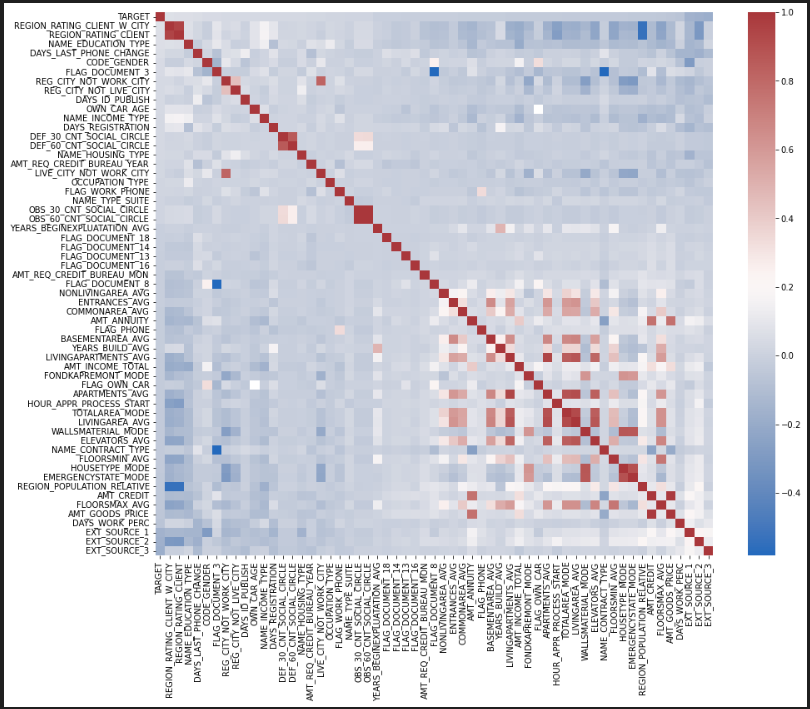

## Missing Values
*   Check for missing values and quantify.
*   Some variables have significant amount missing, where more than 60% of values are missing, the variables are dropped from anaylisis.

In [11]:
# Count missing values
def prop_na(df):
    num_mis = df.isna().sum()
    perc = (num_mis/len(df)*100).map('{:,.2f}'.format)
    return pd.DataFrame({"cnt_miss": num_mis.values, "perc_miss":perc}) 

# percent missing
# prop_na(df)

# drop variable with more than 60% missing values.
df = df.drop(columns=['COMMONAREA_AVG', 'FONDKAPREMONT_MODE', 'FLOORSMIN_AVG', 'YEARS_BUILD_AVG', 'OWN_CAR_AGE'])

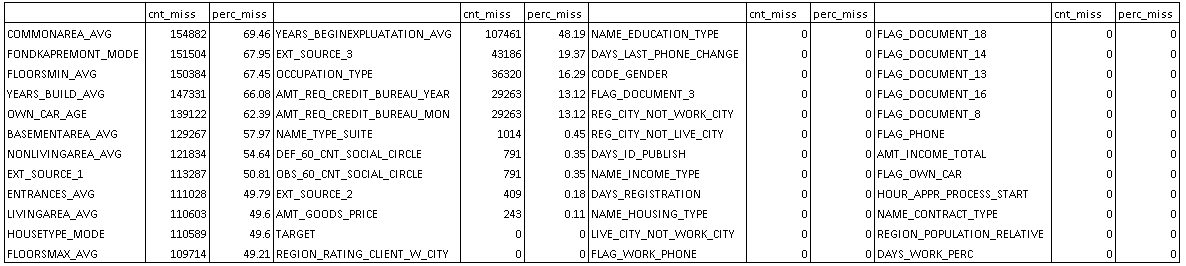

Using data types, identify the columns for segregation to fill missing values by categorical and binary/boolean variables.

In [12]:
# Select float, integer and object columns for later identification/analysis
int_cols = df.select_dtypes(include=[int]).columns # get integer columns
cat_cols = df.select_dtypes(include=[object]).columns # get the object columns
float_cols = df.select_dtypes(include=[float]).columns # get float columns

#### Extreme entries/ outliers
The data has some extreme values, i.e the variable 'AMT_INCOME_TOTAL' has a maximum value of 117,000,000.00 which is way higher than the upper limit of 337,500. We will use the 1.5IQR method to identify outliers in the dataset and remove them. We will then run the model with the outliers and without the outliers to compare the effect of the outliers on the results.

In [ ]:
# # Using 1.5IQR method to identify and remove outliers
# Q1 = df[float_cols].quantile(0.25) # get the 25 quantile
# Q3 = df[float_cols].quantile(0.75)  # get the 75 quantitle
# IQR = Q3 - Q1
# LL = Q1-1.5*IQR
# UL = Q3+1.5*IQR
# outliers = df[float_cols][(df[float_cols] < LL) | (df[float_cols] > UL)]
# # remove the outliers
# df[float_cols] = df[float_cols][~((df[float_cols] < LL) | (df[float_cols] > UL))]


# # Using 1.5IQR method to identify and remove outliers
# Q1 = df[int_cols].quantile(0.25) # get the 25 quantile
# Q3 = df[int_cols].quantile(0.75)  # get the 75 quantitle
# IQR = Q3 - Q1
# LL = Q1-1.5*IQR
# UL = Q3+1.5*IQR
# #remove the outliers
# df[int_cols] = df[int_cols][~((df[int_cols] < LL) | (df[int_cols] > UL))]
# # df.describe().transpose().map('{:,.2f}'.format)

### Check the distribution of target variable.

In [ ]:
# from matplotlib.patches import Patch #adding color to charts
# # get totals and calculate percentages
# total = len(df.TARGET)
# # calculate the total for each category and make a dataframe
# grp = df.groupby(['TARGET']) # create seperate groups for 1 and 0
# group = grp['TARGET'].count().sort_values(ascending=False).to_frame() # count occurances and make into dataframe
# # compute percentage of each TARGET class
# percentage = []
# for i in range(group.shape[0]):
#     pct = (group.TARGET[i] / total) * 100
#     percentage.append(round(pct, 2))

# group = group.rename(columns={'TARGET':'Difficulty'}).reset_index()
# # display data
# group['Percentage'] = percentage
# # Change the TARGET entries from 0 to No and 1 to Yes
# group.TARGET = group.TARGET.apply(lambda x: 'No' if x == 0 else x)
# group.TARGET = group.TARGET.apply(lambda x: 'Yes' if x == 1 else x)
# # Create a bar chart to show distribution of TARGET counts
# plt.figure(figsize=(10, 8))
# objects = list(group.TARGET) # create a list of TARGET classes
# colors_list = ['#5eb0e5', '#ffa700']
# graph = plt.bar(group.TARGET, group.Difficulty, color=colors_list)
# plt.title('Payment History')

# # map names to colors
# cmaps = dict(zip(group.Difficulty, colors_list))

# i = 0
# for p in graph:
#     width = p.get_width()
#     height = p.get_height()
#     x, y = p.get_xy()
     
#     plt.text(x+width/2,
#              y+height*1.01,
#              str(group.Percentage[i])+'%',
#              ha='center')
#     i += 1

# # create the rectangles for the legend
# patches = [Patch(color=v, label=k) for k, v in cmaps.items()]

# plt.xticks(rotation=0)
# plt.ylabel('Count of Applications')
# plt.legend(title='Difficulty',
#            labels=objects,
#            handles=patches,
#            bbox_to_anchor=(1.04, 0.5),
#            loc='center left', 
#            borderaxespad=0, 
#            fontsize=15, 
#            frameon=False)
# plt.show()

There is a huge group imbalance in our dataset, with more than 91% of individuals not having experienced any payment difficulty. This will skew our results as the model will be more inclined to predict no deliquencies just due to the overwhelming number of points that are not deliquent.

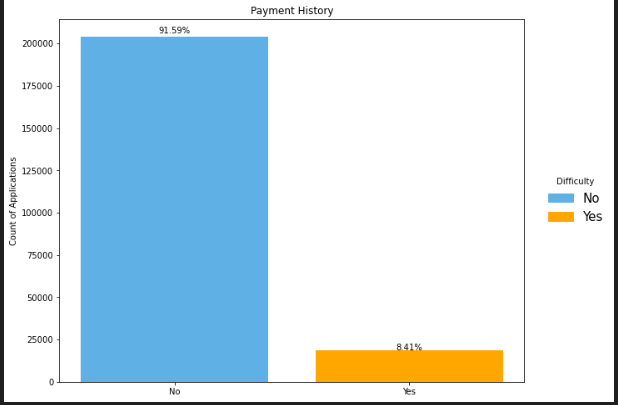
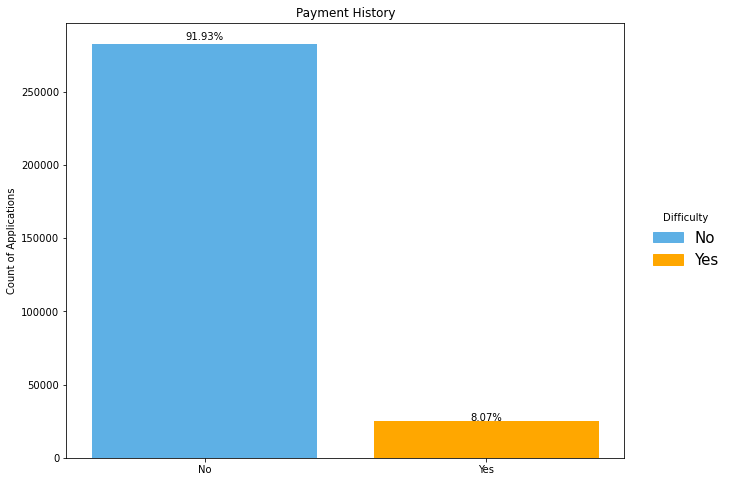

In [ ]:
# Distribution of TARGET by CODE_GENDER, NAME_CONTRACT_TYPE, and AMT_INCOME_TOTAL.
# crosstabgender = pd.crosstab(index=df['CODE_GENDER'], columns=df['TARGET'])
# crosstabcontract = pd.crosstab(index=df['NAME_CONTRACT_TYPE'], columns=df['TARGET'])

# crosstabgender.plot.bar(figsize=(7,5), rot=0)
# crosstabcontract.plot.bar(figsize=(7,5), rot=0)
# crosstabgender

# Distribution of income for both classes
# plt.figure(figsize=(10, 8))
# sns.histplot(x='AMT_INCOME_TOTAL', hue='TARGET', bins=8, data=df)
# plt.show()

<table>
<tr><td>

CODE_GENDER | 0 | 1
---|---|---
F | 129534 | 10395
M | 74695	| 8348

</td><td>

NAME_CONTRACT_TYPE | 0 | 1
---|---|---
Cash Loans | 182253 | 17498
Revolving Loans | 21976	| 1245

</td></tr></table> 

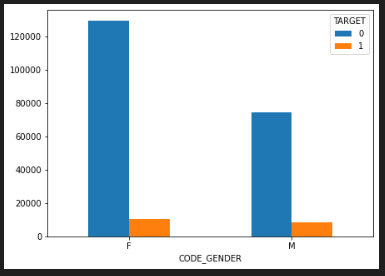 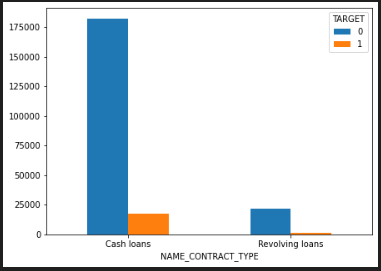   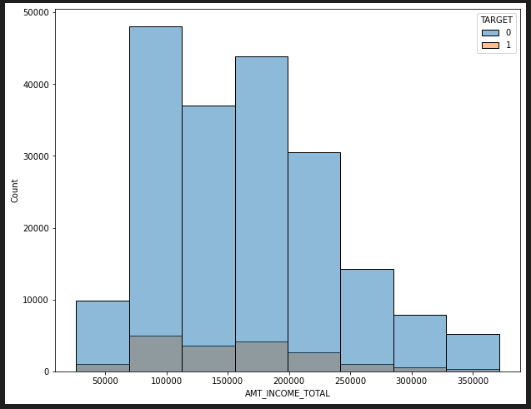  Income distribution is a little skewed to the right for both classes

# K-Means Imputation
We will fill missing values based on the clustering obtained from K-means clustering, to ensure we get better imputation than using global mean/medina for all dataframe.

In [14]:
from sklearn.preprocessing import StandardScaler
# using only the integer and float columns
df_num = df[int_cols].merge(df[float_cols], on='SK_ID_CURR', how='inner')

# Grab colum names to attach back after standadizing data
cols = list(df_num.columns)

# Scale data
scaling=StandardScaler()

# fit and transform standardized data
df_scaled = scaling.fit_transform(df_num)

# add column names to the standardized data
df_scaled = pd.DataFrame(df_scaled, columns=cols)

We use the elbow method to decide on the approriate number of clusters to use.

In [15]:
# # Using elbow method to determine number of cluasters
from sklearn.cluster import KMeans
df_scaled = df_scaled.fillna(df_scaled.mean())
# num_clusters = 8
# kmeans_tests = [KMeans(n_clusters=i, init='random', n_init=10) for i in range(1, num_clusters)]
# score = [kmeans_tests[i].fit(df_scaled).score(df_scaled) for i in range(len(kmeans_tests))]

# Plot the curve
# plt.figure(figsize=(10,8), dpi=100)
# plt.plot(range(1, num_clusters),score)
# plt.xlabel('Number of Clusters')
# plt.ylabel('Score')
# plt.title('Elbow Curve')
# plt.show()

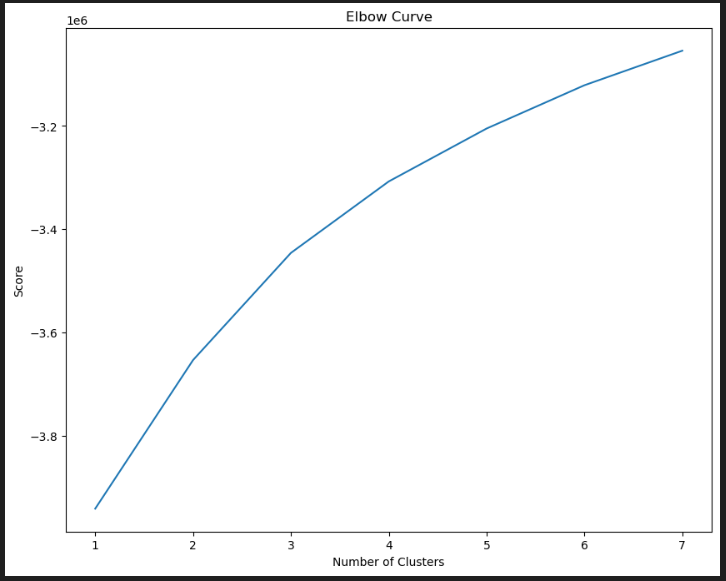

Elbow method suggests two clusters are approprtiate to use. Using the suggested number of clusters above fit a K-Means model to find cluster for imputation.

In [16]:
# fit the KMeans model and make predictions
n_init = 10
num_clusters = 2 #4
kmeans = KMeans(init='random', n_clusters=num_clusters, n_init=n_init)
result = kmeans.fit(df_scaled)
clusters =  kmeans.predict(df_scaled)

Plot the clusters to visualize the difference, we can see a clear separation of the clusters AMT_INCOME_TOTAL and AMT_CREDIT

In [17]:
# # Generate a scatterplot and boxplot of the clusters using AMT_CREDIT and AMT_INCOME_TOTAL.
# fig, ax = plt.subplots(ncols=2, figsize =(17, 9), tight_layout = True)
# sns.scatterplot(data = df_scaled, x = 'AMT_INCOME_TOTAL', y = 'AMT_GOODS_PRICE', hue = kmeans.labels_, ax=ax[0])
# sns.boxplot(x = kmeans.labels_, y = df_num['AMT_GOODS_PRICE'], ax=ax[1])
# plt.show()

The plots show how the data is clustered and it can be observed that we have rather two distinct classes in our data.
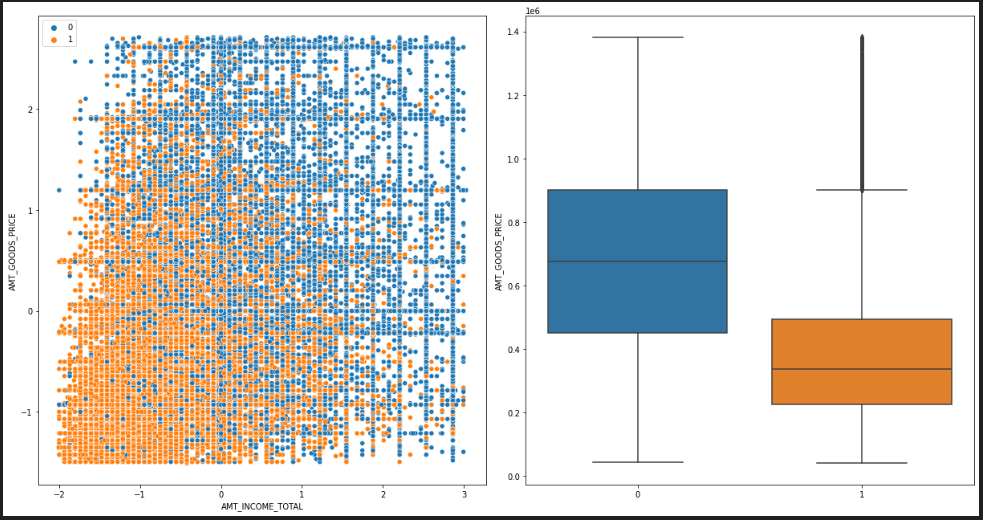
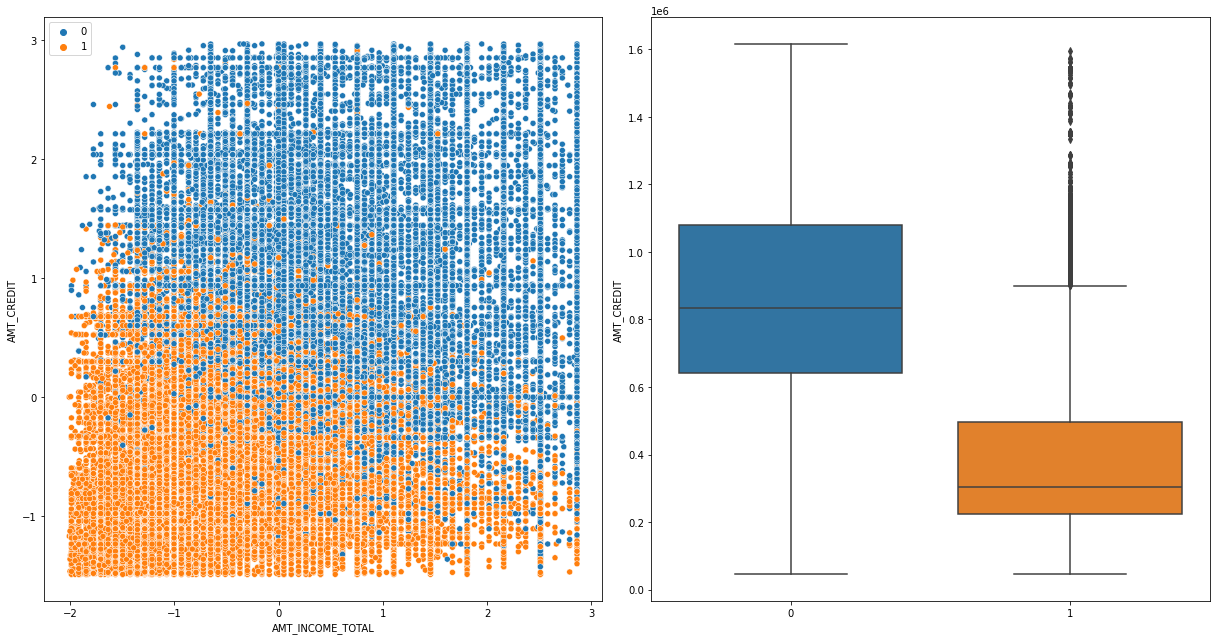

Using clustering in imputation is a more efficent than using the global mean/median as it aligns more closely to the data distribution.

In [18]:
# Add cluster column to original table and fill with cluster values.
df_f = df.copy()
df_f['cluster'] = clusters

# subset dataframe using the clusters
clust0 = df_f[df_f.cluster==0]
clust1 = df_f[df_f.cluster==1]


# fill missing values with means using cluster subsetting
clust0[float_cols] = clust0[float_cols].fillna(clust0[float_cols].mean()) 
clust0[int_cols] = clust0[int_cols].fillna(clust0[int_cols].median())
clust0[cat_cols] = clust0[cat_cols].fillna('missing')
clust1[float_cols] = clust1[float_cols].fillna(clust1[float_cols].mean()) 
clust1[int_cols] = clust1[int_cols].fillna(clust1[int_cols].median())
clust1[cat_cols] = clust1[cat_cols].fillna('missing')


#check shape of the cluster subsets
print(clust0.shape, clust1.shape)
# Join the two subsets back together.
df_f = pd.concat([clust0, clust1], ignore_index=True)

# drop the cluster column
df_f = df_f.drop('cluster', axis=1)

# print total missing original
print('Missing Original: %d' % df.isna().sum().sum())
# print total missing
print('Missing after K-Means: %d' % df_f.isna().sum().sum())

(121430, 83) (101542, 83)
Missing Original: 2255895
Missing after K-Means: 0


In [19]:
# Select float, integer and object columns for later identification/analysis
int_cols = df_f.select_dtypes(include=[int]).columns # get integer columns
bool_cols = df_f.select_dtypes(include=[bool]).columns # get bool columns
cat_cols = df_f.select_dtypes(include=[object]).columns # get the object columns
float_cols = df_f.select_dtypes(include=[float]).columns # get float columns

# convert all boolean columns to int
df_f[bool_cols] = df_f[bool_cols].astype(int)

## Scoring Model
#### Prepare data for modeling
-   Convert all the categorical variables to numerical (boolean) by creating new columns for each class of the variable
-   Subset the data into traing, validation and testing sets

In [20]:
# # Convert categorical data to numeric with `pd.get_dummies`
dummy = cat_cols.to_list()

df_dummies = pd.get_dummies(df_f, columns=dummy, dtype='int')
df_dummies.head()

,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,...,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_missing,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house
0,1,0,1,0,"202,500.00","351,000.00",0.02,"-3,648.00",-2120,1,...,0,0,0,0,0,0,1,0,0,0
1,0,1,1,0,"67,500.00","135,000.00",0.01,"-4,260.00",-2531,1,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,"121,500.00","513,000.00",0.03,"-4,311.00",-3458,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,1,"112,500.00","652,500.00",0.02,"-4,427.00",-738,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,"67,500.00","67,500.00",0.03,-311.00,-3227,1,...,0,0,0,0,0,0,1,0,0,0


In [21]:
# Separate the data into labels and features
# Split our preprocessed data into features and target arrays
y = df_dummies['TARGET']
X = df_dummies.drop('TARGET',axis=1)

# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the float variables to ensure balanced magnitude/weight
X_train = StandardScaler().fit_transform(X_train)

### Base Model
Is a DummyClasifier model that fits the target without regard to the features.
The base model is used to compare the other more complex model to gauge improvement in model accuracy. We use model accuracy as the metric of choice for comparison.

In [22]:
# Import the necessary libraries for LogisticRegression
from sklearn.dummy import DummyClassifier
import sklearn.metrics as metrics
from sklearn.metrics import balanced_accuracy_score, accuracy_score, mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score

dummy_mod = DummyClassifier(strategy="most_frequent")
dummy_mod.fit(X_train, y_train)

dummy_pred = dummy_mod.predict(X_test)

# Generate a confusion matrix for the model
dummy_cm = confusion_matrix(y_test, dummy_pred)
dummy_cm_df = pd.DataFrame(
    dummy_cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Print the classification report for the model
print("Confusion Matrix")
display(dummy_cm_df)

print("Classification Report")
print(classification_report(y_test, dummy_pred))
print(f"Accuracy Score : {accuracy_score(y_test, dummy_pred): .3f}, \
      Recall score: {recall_score(y_test,dummy_pred): .3f}")
print(f'Area Under Curve: {roc_auc_score(y_test, dummy_mod.predict_proba(X_test)[::,1]): .4f}')

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,40944,0
Actual 1,3651,0


Classification Report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     40944
           1       0.00      0.00      0.00      3651

    accuracy                           0.92     44595
   macro avg       0.46      0.50      0.48     44595
weighted avg       0.84      0.92      0.88     44595

Accuracy Score :  0.918,       Recall score:  0.000
Area Under Curve:  0.5000


##### Model Results
From the confusion matrix, we see that the model with outliers removed performs a little better than the one that has the outliers.

<table>
<tr><th>Outliers Included </th><th>Outliers Removed</th></tr>
<tr><td>

+ |Predicted 0 | Predicted 1
 ---|---|---
Actual 0 | 40708 | 0
Actual 1 | 3788	| 0

Classification Report
`|precision | recall | f1-score | support
---|---|---|---|---
0|0.92| 1.00| 0.96| 40807
1| 0.00| 0.00 | 0.00 | 3788
accuracy | | | 0.92| 44595
macro avg | 0.46| 0.50| 0.48| 44595
weighted avg | 0.84| 0.92| 0.87| 44595

Accuracy Score   *0.915*,     
Recall score  *0.000*
Area Under Curve  *0.500*

</td><td>

+ |Predicted 0 | Predicted 1
 ---|---|---
Actual 0 | 47193 | 9316
Actual 1 | 2643	| 2351

Classification Report
`|precision | recall | f1-score | support
---|---|---|---|---
0 |0.95 | 0.84 | 0.89 |    56509
1 |    0.20 |    0.47 |    0.28 |     4994
accuracy | | | 0.81 |    61503
macro avg |      0.57 |     0.65  |    0.58 |    61503
weighted avg |      0.89 |     0.81 |     0.84 |    61503

Accuracy Score   *0.806*,      
Recall score  *0.471*,
Area Under Curve  *0.7401*

</td></tr> </table>

## Logistic Regression
From the Linear regression above we can clearly see that, the method is not approriate as the residual plot suggests pattern in the residuals. Since the target/response is binary, it is inapproriate to carryout Linear regression analysis to make predictions. Using Logistic regression would more suited to the data than Linear regression.

In [23]:
# Instantiate the Logistic Regression model
from sklearn.linear_model import LogisticRegression
logit_mod = LogisticRegression(solver='lbfgs', random_state=13, fit_intercept=False)

# Fit the model using training data
logit_mod.fit(X_train, y_train)

# Make predictions using the testing data
y_logit = logit_mod.predict(X_test)

# Print the balanced_accuracy score of the model
print(f'Training Data Score: {logit_mod.score(X_train, y_train): .3f},\
       Testing Data Score: {logit_mod.score(X_test, y_test): .3f}')


# Generate a confusion matrix for the model
cm = confusion_matrix(y_test, y_logit)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Print the classification report for the model
print("Confusion Matrix")
display(cm_df)

print("Classification Report")
print(classification_report(y_test, y_logit))
print(f"Accuracy Score : {accuracy_score(y_test, y_logit): .3f}, \
      Recall score: {recall_score(y_test,y_logit): .3f}")
print(f'Area Under Curve: {roc_auc_score(y_test, logit_mod.predict_proba(X_test)[::,1]): .4f}')

Training Data Score:  0.571,       Testing Data Score:  0.082
Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,0,40944
Actual 1,0,3651


Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     40944
           1       0.08      1.00      0.15      3651

    accuracy                           0.08     44595
   macro avg       0.04      0.50      0.08     44595
weighted avg       0.01      0.08      0.01     44595

Accuracy Score :  0.082,       Recall score:  1.000
Area Under Curve:  0.5000


##### Model Results
From the confusion matrix, we see that the model with outliers removed performs a little better than the one that has the outliers.

<table>
<tr><th>Outliers Included </th><th>Outliers Removed</th></tr>
<tr><td>

+ |Predicted 0 | Predicted 1
 ---|---|---
Actual 0 | 0 | 40877
Actual 1 | 0	| 3718

Classification Report
`|precision | recall | f1-score | support
---|---|---|---|---
0 |0.00 | 0.00 | 0.00 |    40877
1 |    0.00 |    1.00 |    0.15 |     3718
accuracy | | |  0.08|   44595
macro avg |      0.04 |     0.50  |    0.08 |    44595
weighted avg |      0.01 |     0.08 |     0.01 |    44595

Accuracy Score   *0.083*,
Recall score  *1.000*,      
Area Under Curve  *0.500*

</td><td>

+ |Predicted 0 | Predicted 1
 ---|---|---
Actual 0 | 47193 | 9316
Actual 1 | 2643	| 2351

Classification Report
`|precision | recall | f1-score | support
---|---|---|---|---
0 |0.95 | 0.84 | 0.89 |    56509
1 |    0.20 |    0.47 |    0.28 |     4994
accuracy | | | 0.81 |    61503
macro avg |      0.57 |     0.65  |    0.58 |    61503
weighted avg |      0.89 |     0.81 |     0.84 |    61503

Accuracy Score   *0.806*,
Recall score  *0.471*,
Area Under Curve  *0.7401*

</td></tr> </table>

### Using class weights to improve on the model
We wuse the class weights because our data is highly imbalanced, using class weights ensures that the classes are adequately represented in the model.

In [24]:
# define class weights
w = {0:1, 1:99}

# define model
wt_logit = LogisticRegression(random_state=13, class_weight=w)
# wt_logit = LogisticRegression(class_weight=w)

# fit it
wt_logit.fit(X_train,y_train)
# test
y_wt = wt_logit.predict(X_test)
y_wt_pred = wt_logit.predict_proba(X_test)[::,1]
# performance
cm_wt = confusion_matrix(y_test, y_wt)
cm_wt_df = pd.DataFrame(cm_wt, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
# Print the classification report for the model
print("Confusion Matrix")
display(cm_wt_df)
print("Classification Report")
print(classification_report(y_test, y_wt))
print(f"Accuracy Score : {accuracy_score(y_test, y_wt): .3f},\
      Recall score: {recall_score(y_test,y_wt): .3f}")
print(f'Area Under Curve: {roc_auc_score(y_test, y_wt_pred): .3f}')

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,0,40944
Actual 1,0,3651


Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     40944
           1       0.08      1.00      0.15      3651

    accuracy                           0.08     44595
   macro avg       0.04      0.50      0.08     44595
weighted avg       0.01      0.08      0.01     44595

Accuracy Score :  0.082,      Recall score:  1.000
Area Under Curve:  0.500


##### Model Results
From the confusion matrix, we see that the model with outliers removed performs a little better than the one that has the outliers.

<table>
<tr><th>Outliers Included </th><th>Outliers Removed</th></tr>
<tr><td>

+ |Predicted 0 | Predicted 1
---|---|---
Actual 0 | 0 | 40877
Actual 1 | 0	| 3718

Classification Report
`|precision | recall | f1-score | support
---|---|---|---|---
0 |0.00 | 0.00 | 0.00 |    40877
1 |    0.00 |    1.00 |    0.15 |     3718
accuracy | | |  0.08|   44595
macro avg |      0.04 |     0.50  |    0.08 |    44595
weighted avg |      0.01 |     0.08 |     0.01 |    44595

Accuracy Score   *0.083*,
Recall score  *1.000*,      
Area Under Curve  *0.500*

</td><td>

+ |Predicted 0 | Predicted 1
 ---|---|---
Actual 0 | 43430 | 13079
Actual 1 | 2087	| 2907

Classification Report
`|precision | recall | f1-score | support
---|---|---|---|---
0 |0.95 | 0.77 | 0.85 |    56509
1 |    0.18 |    0.58 |    0.28 |     4994
accuracy | | |  0.75 |    61503
macro avg |      0.57 |     0.68  |    0.56 |    61503
weighted avg |      0.89 |     0.75 |     0.80 |    61503

Accuracy Score   *0.753*,
Recall score  *0.582*,
Area Under Curve  *0.7410*

</td></tr> </table>

### Improve the model
##### Using random oversampling to balance the classes

In [25]:
# Import the RandomOverSampler module from imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
ros = RandomOverSampler(sampling_strategy='minority', random_state=13)

# Fit the original training data to the random_oversampler model
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# Count the distinct values of the resampled labels data
from collections import Counter
print(sorted(Counter(y_train_ros).items()))

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
ros_model = LogisticRegression(solver='lbfgs', random_state=13, fit_intercept=False)

# Fit the model using the resampled training data
ros_model.fit(X_train_ros, y_train_ros)

# Make a prediction using the testing data
y_ros_pred = ros_model.predict(X_test)

# Generate a confusion matrix for the model
cm_ros = confusion_matrix(y_test, y_ros_pred)
cm_ros_df = pd.DataFrame(
    cm_ros, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)
print("Confusion Matrix")
display(cm_ros_df)

# Print the classification report for the model
print("Classification Report")
print(classification_report(y_test, y_ros_pred))

# Print the balanced_accuracy score of the model 
print(f'Accuracy Score : {accuracy_score(y_test, y_ros_pred): .3f},\
      Recall score: {recall_score(y_test,y_ros_pred): .3f}')
print(f'Area Under Curve: {roc_auc_score(y_test, ros_model.predict_proba(X_test)[::,1]): .3f}')

[(0, 163285), (1, 163285)]
Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,0,40944
Actual 1,0,3651


Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     40944
           1       0.08      1.00      0.15      3651

    accuracy                           0.08     44595
   macro avg       0.04      0.50      0.08     44595
weighted avg       0.01      0.08      0.01     44595

Accuracy Score :  0.082,      Recall score:  1.000
Area Under Curve:  0.500


##### Model Results
From the confusion matrix, we see that the model with outliers removed performs a little better than the one that has the outliers.

<table>
<tr><th>Outliers Included </th><th>Outliers Removed</th></tr>
<tr><td>

+ |Predicted 0 | Predicted 1
 ---|---|---
Actual 0 | 0 | 40877
Actual 1 | 0	| 3718

Classification Report
`|precision | recall | f1-score | support
---|---|---|---|---
0 |0.00 | 0.00 | 0.00 |    40877
1 |    0.00 |    1.00 |    0.15 |     3718
accuracy | | |  0.08|   44595
macro avg |      0.04 |     0.50  |    0.08 |    44595
weighted avg |      0.01 |     0.08 |     0.01 |    44595

Accuracy Score   *0.083*,
Recall score  *1.000*,      
Area Under Curve  *0.500*

</td><td>

+ |Predicted 0 | Predicted 1
 ---|---|---
Actual 0 | 30889 | 25620
Actual 1 | 1046	| 3948

Classification Report
`|precision | recall | f1-score | support
---|---|---|---|---
0 |0.97 | 0.55 | 0.70 |    56509
1 |    0.13 |    0.79 |    0.23 |     4994
accuracy | | | 0.57 | 61503
macro avg |      0.55 |     0.67  |    0.46 |    61503
weighted avg |      0.90 |     0.57 |     0.66 |    61503

Accuracy Score :  *0.566*,
Recall score:  *0.791*,
Area Under Curve:  *0.741*

</td></tr> </table>

##### Using random undersampling to balance the classes

In [26]:
# Import the RandomOverSampler module from imbalanced-learn
from imblearn.under_sampling import RandomUnderSampler

# Instantiate the random oversampler model
rus = RandomUnderSampler(sampling_strategy='majority', random_state=13)

# Fit the original training data to the random_oversampler model
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Count the distinct values of the resampled labels data
from collections import Counter
print(sorted(Counter(y_train_rus).items()))

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
rus_model = LogisticRegression(solver='lbfgs', random_state=13, fit_intercept=False)

# Fit the model using the resampled training data
rus_model.fit(X_train_rus, y_train_rus)

# Make a prediction using the testing data
y_rus_pred = rus_model.predict(X_test)

# Generate a confusion matrix for the model
cm_rus = confusion_matrix(y_test, y_rus_pred)
cm_rus_df = pd.DataFrame(
    cm_rus, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)
print("Confusion Matrix")
display(cm_ros_df)

# Print the classification report for the model
print("Classification Report")
print(classification_report(y_test, y_rus_pred))

# Print the balanced_accuracy score of the model 
print(f'Accuracy Score : {accuracy_score(y_test, y_rus_pred): .3f},\
      Recall score: {recall_score(y_test,y_rus_pred): .3f}')
print(f'Area Under Curve: {roc_auc_score(y_test, rus_model.predict_proba(X_test)[::,1]): .3f}')

[(0, 15092), (1, 15092)]
Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,0,40944
Actual 1,0,3651


Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     40944
           1       0.08      1.00      0.15      3651

    accuracy                           0.08     44595
   macro avg       0.04      0.50      0.08     44595
weighted avg       0.01      0.08      0.01     44595

Accuracy Score :  0.082,      Recall score:  1.000
Area Under Curve:  0.500


## Random Forests Model

In [27]:
from sklearn.ensemble import RandomForestClassifier
#instantiate the classifier
rf_model = RandomForestClassifier(n_estimators=50, random_state=13)
#fit the model
rf_model.fit(X_train, y_train)
# make predictions
rf_pred = rf_model.predict(X_test)

# get the predicted probabilities
rf_probs = rf_model.predict_proba(X_test)

# Generate a confusion matrix for the model
cm_rf = confusion_matrix(y_test, rf_pred)
cm_rf_df = pd.DataFrame(
    cm_rf, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)
print("Confusion Matrix")
display(cm_rf_df)

# Print the classification report for the model
print("Classification Report")
print(classification_report(y_test, rf_pred))
# Print the balanced_accuracy score of the model 
print(f"Accuracy Score : {accuracy_score(y_test, rf_pred): .3f},\
      Recall score: {recall_score(y_test, rf_pred): .3f}")
print(f'Area Under Curve: {roc_auc_score(y_test, rf_model.predict_proba(X_test)[::,1]): .3f}')

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,40876,68
Actual 1,3635,16


Classification Report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     40944
           1       0.19      0.00      0.01      3651

    accuracy                           0.92     44595
   macro avg       0.55      0.50      0.48     44595
weighted avg       0.86      0.92      0.88     44595

Accuracy Score :  0.917,      Recall score:  0.004
Area Under Curve:  0.535


##### Model Results
From the confusion matrix, we see that the model with outliers removed performs a little better than the one that has the outliers.

<table>
<tr><th>Outliers Included </th><th>Outliers Removed</th></tr>
<tr><td>

+ |Predicted 0 | Predicted 1
 ---|---|---
Actual 0 | 40841 | 36
Actual 1 | 3715	| 3

Classification Report
`|precision | recall | f1-score | support
---|---|---|---|---
0 |0.92 | 1.00 | 0.96 |    40877
1 |    0.08 |   0.00 |    0.00 |     3718
accuracy | | |  0.92|   44595
macro avg |      0.50 |     0.50  |    0.48 |    44595
weighted avg |      0.85 |     0.92 |     0.88 |    44595

Accuracy Score   *0.916*,
Recall score  *0.001*,      
Area Under Curve  *0.457*

</td><td>

+ |Predicted 0 | Predicted 1
 ---|---|---
Actual 0 | 56503 | 6
Actual 1 | 4990	| 4

Classification Report
`|precision | recall | f1-score | support
---|---|---|---|---
0 |0.92 | 1.00 | 0.96 |    56509
1 |    0.40 |    0.00 |    0.00 |     4994
accuracy | | |  0.92|    61503
macro avg |      0.66 |     0.50  |    0.48 |    61503
weighted avg |      0.88 |     0.92 |     0.88 |    61503

Accuracy Score   *0.919*,
Recall score  *0.001*,
Area Under Curve  *0.696*

</td></tr> </table>

#### Important Features
The most important features in for modeling are as shown in the chart, those features with positive values are the important in predicting the positive class (1) while those with negative values are import in predictinig the negative class (0). Even though the scores are very low which is most likely due to the class imbalannce, we are able to get a relatively clear picture of the most important features. EXT_SOURCE_3 seems to be the most import of all the features.

The positive coefficient scores indicate features that predict the positive (1) class while the negative coefficients indicate the features that predict the negative (0) class.

In [28]:
# important features using the RidgeCV estimator. 
# The features with the highest absolute coef_ value are considered the most important. 
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import RidgeCV
feature_names = np.array([column for column in df_dummies.columns.to_list() if column not in ['TARGET']])
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X_train, y_train)
importance = ridge.coef_

# An interactive bar plot of features
import plotly.express as px
features = pd.DataFrame({"importance": importance, "features":feature_names}) 
fig = px.bar(features,
             x='features',
             y='importance',
             title='Feature Importance')
fig.update_layout(
autosize=True,
width=1000,
height=800,
)
fig.show()

In [38]:
pd.reset_option('display.max_rows')
features.sort_values(['importance'], ascending=False)

,importance,features
38,0.01,FLAG_DOCUMENT_3
5,0.01,REGION_POPULATION_RELATIVE
35,0.00,DEF_60_CNT_SOCIAL_CIRCLE
73,0.00,CODE_GENDER_M
20,0.00,REG_CITY_NOT_LIVE_CITY
...,...,...
67,-0.01,EXT_SOURCE_2^2
0,-0.01,FLAG_OWN_CAR
23,-0.02,EXT_SOURCE_1
24,-0.03,EXT_SOURCE_2


In [41]:
# Fit model with only the important features
# imp_features = df_dummies[['DAYS_WORK_PERC', 'REGION_POPULATION_RELATIVE','NAME_INCOME_TYPE_Maternity leave', 
#                      'FLOORSMAX_AVG', 'NAME_EDUCATION_TYPE_Academic degree',
#                      'EXT_SRC', 'NAME_INCOME_TYPE_Student', 'NAME_INCOME_TYPE_Pensioner']]
imp_features = df_dummies[['FLAG_DOCUMENT_3','REGION_POPULATION_RELATIVE', 'EXT_SOURCE_2^2', 'FLAG_OWN_CAR',
                            'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3', 'DAYS_WORK_PERC']]

# Split the data using train_test_split
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(imp_features, y, test_size=0.2, random_state=42)

# # Standardize data
X_train_imp = StandardScaler().fit_transform(X_train_imp)
X_test_imp = StandardScaler().fit_transform(X_test_imp)
#instantiate the classifier
rf_imp = RandomForestClassifier(n_estimators=50, random_state=13)
#fit the model
rf_imp.fit(X_train_imp, y_train_imp)
# make predictions
rf_imp_pred = rf_imp.predict(X_test_imp)

# get the predicted probabilities
rf_imp.predict_proba(X_test_imp)

# Generate a confusion matrix for the model
cm_rf_imp = confusion_matrix(y_test_imp, rf_imp_pred)
cm_rf_imp_df = pd.DataFrame(
    cm_rf_imp, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)
print("Confusion Matrix")
display(cm_rf_imp_df)

# Print the classification report for the model
print("Classification Report")
print(classification_report(y_test_imp, rf_imp_pred))

# Print the balanced_accuracy score of the model 
print(f'Accuracy Score : {accuracy_score(y_test, rf_imp_pred): .3f},\
      Recall score: {recall_score(y_test_imp, rf_imp_pred): .3f}')
print(f'Area Under Curve: {roc_auc_score(y_test_imp, rf_imp.predict_proba(X_test_imp)[::,1]): .3f}')

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,40812,132
Actual 1,3572,79


Classification Report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     40944
           1       0.37      0.02      0.04      3651

    accuracy                           0.92     44595
   macro avg       0.65      0.51      0.50     44595
weighted avg       0.87      0.92      0.88     44595

Accuracy Score :  0.917,      Recall score:  0.022
Area Under Curve:  0.718


In [42]:
#instantiate the classifier
log_imp = LogisticRegression(solver='lbfgs', fit_intercept=False, random_state=13)

#fit the model
log_imp.fit(X_train_imp, y_train_imp)
# make predictions
log_imp_pred = log_imp.predict(X_test_imp)

# get the predicted probabilities
y_log = log_imp.predict_proba(X_test_imp)[::,1]

# Generate a confusion matrix for the model
cm_imp = confusion_matrix(y_test_imp, log_imp_pred)
cm_imp_df = pd.DataFrame(
    cm_imp, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)
print("Confusion Matrix")
display(cm_imp_df)

# Print the classification report for the model
print("Classification Report")
print(classification_report(y_test_imp, log_imp_pred))

# Print the balanced_accuracy score of the model 
print(f'Accuracy Score : {accuracy_score(y_test_imp, log_imp_pred): .3f},\
      Recall score: {recall_score(y_test_imp, log_imp_pred): .3f}')
print(f'Area Under Curve: {roc_auc_score(y_test_imp, y_log): .3f}')

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,22261,18683
Actual 1,686,2965


Classification Report
              precision    recall  f1-score   support

           0       0.97      0.54      0.70     40944
           1       0.14      0.81      0.23      3651

    accuracy                           0.57     44595
   macro avg       0.55      0.68      0.47     44595
weighted avg       0.90      0.57      0.66     44595

Accuracy Score :  0.566,      Recall score:  0.812
Area Under Curve:  0.749


##### Model Results
From the confusion matrix, we see that the model with outliers removed performs a little better than the one that has the outliers.

<table>
<tr><th>Outliers Included </th><th>Outliers Removed</th></tr>
<tr><td>

+ |Predicted 0 | Predicted 1
 ---|---|---
Actual 0 | 22413 | 18445
Actual 1 | 817	| 2920

Classification Report
`|precision | recall | f1-score | support
---|---|---|---|---
0 |0.96 | 0.55 | 0.70 |    40858
1 |    0.14 |    0.78 |    0.23 |     3737
accuracy | | |  0.57|    44595
macro avg |      0.55 |     0.66  |    0.47 |    44595
weighted avg |      0.90 |     0.57 |     0.66 |    44595

Accuracy Score   *0.568*,
Recall score  *0.781*,       
Area Under Curve  *0.731*

</td><td>

+ |Predicted 0 | Predicted 1
 ---|---|---
Actual 0 | 31455 | 25054
Actual 1 | 1178	| 3816

Classification Report
`|precision | recall | f1-score | support
---|---|---|---|---
0 |0.96 | 0.56 | 0.71 |    56509
1 |    0.13 |    0.76 |    0.23 |     4994
accuracy | | |  0.57 |    61503
macro avg |      0.55 |     0.66  |    0.47 |    61503
weighted avg |      0.90|     0.57 |     0.67 |    61503

Accuracy Score   *0.573*,
Recall score  *0.764*,       
Area Under Curve  *0.726*

</td></tr> </table>

#### Repeated Stratified K-Fold Crossvalidation
We can use repeated strrtified k-fold cross-validation to improve on the model accuracy

In [43]:
# # Model metrics for the regular logistic regression
from sklearn.model_selection import GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score

# # Using K-fold crossvalidation and stratification
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats= 3, random_state=13)
model = LogisticRegression()
# scores = 1 - cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

# print(f"Mean(Misclassification error rate in test), {np.mean(scores) : .3f} with stdev = {np.std(scores) : .4f} ")

# #plot the errors
# import seaborn as sns
# ax = sns.histplot(x=scores, kde=True)
# print(scores)

For the Cross-validation, the mis-classification score(error-rate) is very stable at about 0.081, which is similar to the propotion of the deliquent class. The score for each of the 30 runs are listed below:
Run | Error-rate|Run | Error-rate|Run | Error-rate|Run | Error-rate|Run | Error-rate|Run | Error-rate
---|---|---|---|---|---|---|---|---|---|---|---
1|0.08113491 |6|0.08137881 |11|0.08085037 |16|0.08080972 |21|0.08105362 |26|0.08121621
2|0.08109426 |7|0.08129751 |12|0.08121951 |17|0.08077236 |22|0.08089102 |27|0.08109426
3| 0.08158205 |8|0.08109426 |13|0.08097232 |18|0.08080972 |23|0.08113491 |28|0.08121621
4|0.08060976 |9|0.08117886 |14|0.08064713 |19|0.08097232 |24|0.08093167 |29|0.08133816
5| 0.0816227  |10|0.08117556 |15|0.08072843 |20|0.08121621 |25|0.08113821 |30|0.08105691

Mean(Misclassification error rate in test),  0.081 with stdev =  0.0002 

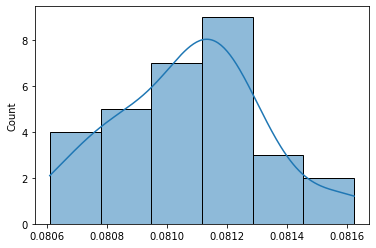

In [44]:
#fit the model
model.fit(X_train, y_train)
# make predictions
preds = model.predict(X_test)

# get the predicted probabilities
y_hat = model.predict_proba(X_test)[::,1]

# Generate a confusion matrix for the model
con_i = confusion_matrix(y_test, preds)
con_i_df = pd.DataFrame(
    con_i, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)
print("Confusion Matrix")
display(con_i_df)

# Print the classification report for the model
print("Classification Report")
print(classification_report(y_test, preds))

# Print the balanced_accuracy score of the model 
print(f'Accuracy Score : {accuracy_score(y_test, preds):.3f},\
      Recall score: {recall_score(y_test, preds):.3f}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_hat):.3f}')


Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,0,40944
Actual 1,0,3651


Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     40944
           1       0.08      1.00      0.15      3651

    accuracy                           0.08     44595
   macro avg       0.04      0.50      0.08     44595
weighted avg       0.01      0.08      0.01     44595

Accuracy Score : 0.082,      Recall score: 1.000
Area Under Curve: 0.500


##### Model Results
From the confusion matrix, we see that the model with outliers removed performs a little better than the one that has the outliers.

<table>
<tr><th>Outliers Included </th><th>Outliers Removed</th></tr>
<tr><td>

 _|Predicted 0 | Predicted 1
 ---|---|---
Actual 0 | 26278 | 14580
Actual 1 | 1478	| 3528

Classification Report
`|precision | recall | f1-score | support
---|---|---|---|---
0 |0.92 | 0.64 | 0.76 |    40858
1 |    0.09 |    0.37 |    0.14 |     3737
accuracy | | |  0.62|    44595
macro avg |      0.50 |     0.51  |    0.45 |    44595
weighted avg |      0.85 |     0.62 |     0.70 |    44595

Accuracy Score   *0.620*,
Recall score  *0.373*,       
Area Under Curve  *0.517*

</td><td>

+ |Predicted 0 | Predicted 1
 ---|---|---
Actual 0 | 31455 | 25054
Actual 1 | 1178	| 3816

Classification Report
`|precision | recall | f1-score | support
---|---|---|---|---
0 |0.96 | 0.56 | 0.71 |    56509
1 |    0.13 |    0.76 |    0.23 |     4994
accuracy | | |  0.57 |    61503
macro avg |      0.55 |     0.66  |    0.47 |    61503
weighted avg |      0.90|     0.57 |     0.67 |    61503

Accuracy Score   *0.573*,
Recall score  *0.764*,      
 Area Under Curve  *0.726*

</td></tr> </table>

In [45]:
# Using SMOTE to improve class imbalance
from imblearn.over_sampling import SMOTE

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

clf = LogisticRegression()
model_res = clf.fit(X_train_res, y_train_res)
# Print the balanced_accuracy score of the model
print(f'Training Data Score: {model_res.score(X_train_res, y_train_res): .3f},\
       Testing Data Score: {model_res.score(X_test, y_test): .3f}')

pred_s = model_res.predict(X_test)

# Generate a confusion matrix for the model
cm_s = confusion_matrix(y_test, pred_s)
cm_s_df = pd.DataFrame(
    cm_s, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Print the classification report for the model
print("Confusion Matrix")
display(cm_s_df)

print("Classification Report")
print(classification_report(y_test, pred_s))
print(f"Accuracy Score : {accuracy_score(y_test, pred_s): .3f}, \
      Balanced Accuracy Score: {balanced_accuracy_score(y_test, pred_s): .3f}")
print(f'Recall score: {recall_score(y_test,pred_s): .3f}, \
      Area Under Curve: {roc_auc_score(y_test, model_res.predict_proba(X_test)[::,1]): .4f}')

Training Data Score:  0.727,       Testing Data Score:  0.082
Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,0,40944
Actual 1,0,3651


Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     40944
           1       0.08      1.00      0.15      3651

    accuracy                           0.08     44595
   macro avg       0.04      0.50      0.08     44595
weighted avg       0.01      0.08      0.01     44595

Accuracy Score :  0.082,       Balanced Accuracy Score:  0.500
Recall score:  1.000,       Area Under Curve:  0.5000


In [46]:
#instantiate the classifier
from sklearn.linear_model import LogisticRegressionCV
w = {0:1, 1:9}
logmod = LogisticRegressionCV(Cs=10,
                              fit_intercept=False,
                              cv=10,
                              dual=False,
                              penalty='l2',
                              scoring='roc_auc',
                              solver='lbfgs',
                              tol=0.0001,
                              max_iter=100,
                              class_weight=w,
                              n_jobs=-1,
                              verbose=2,
                              refit=True,
                              intercept_scaling=1.0,
                              multi_class='auto',
                              random_state=13,
                              l1_ratios=None)

#fit the model
logmod.fit(X_train_imp, y_train_imp)
# make predictions
logmod_pred = logmod.predict(X_test_imp)

# get the predicted probabilities
y_logmod = logmod.predict_proba(X_test_imp)[::,1]

# Generate a confusion matrix for the model
cm_lm = confusion_matrix(y_test_imp, logmod_pred)
cm_lm_df = pd.DataFrame(
    cm_lm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)
print("Confusion Matrix")
display(cm_lm_df)

# Print the classification report for the model
print("Classification Report")
print(classification_report(y_test_imp, logmod_pred))

# Print the balanced_accuracy score of the model 
print(f'Accuracy Score : {accuracy_score(y_test_imp, logmod_pred): .3f},\
      Recall score: {recall_score(y_test_imp, logmod_pred): .3f}')
print(f'Area Under Curve: {roc_auc_score(y_test_imp, y_logmod): .3f}')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.1s finished


Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,21858,19086
Actual 1,640,3011


Classification Report
              precision    recall  f1-score   support

           0       0.97      0.53      0.69     40944
           1       0.14      0.82      0.23      3651

    accuracy                           0.56     44595
   macro avg       0.55      0.68      0.46     44595
weighted avg       0.90      0.56      0.65     44595

Accuracy Score :  0.558,      Recall score:  0.825
Area Under Curve:  0.752
